In [85]:
# Basic Dependencies
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
# Read CSV Files
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
data.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-01-13 15:22:33,33.93911,67.709953,53584.0,2301.0,44850.0,6433.0,137.647787,NaN,NaN,4.294192,4,AFG
1,Albania,2021-01-13 15:22:33,41.15330,20.168300,64627.0,1252.0,38421.0,24954.0,2245.708527,NaN,NaN,1.937271,8,ALB
2,Algeria,2021-01-13 15:22:33,28.03390,1.659600,102641.0,2816.0,69608.0,30217.0,234.067409,NaN,NaN,2.743543,12,DZA
3,Andorra,2021-01-13 15:22:33,42.50630,1.521800,8745.0,87.0,7966.0,692.0,11318.190643,NaN,NaN,0.994854,20,AND
4,Angola,2021-01-13 15:22:33,-11.20270,17.873900,18343.0,422.0,15512.0,2409.0,55.811022,NaN,NaN,2.300605,24,AGO


In [87]:
# Create the target column with pandas for recovery rate using formula 
# Recovery_Rate = Total Recovered / Total Confirmed
data["Recovery_Rate"] = data["Recovered"] / data["Confirmed"]
data.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Recovery_Rate
0,Afghanistan,2021-01-13 15:22:33,33.93911,67.709953,53584.0,2301.0,44850.0,6433.0,137.647787,NaN,NaN,4.294192,4,AFG,0.837004
1,Albania,2021-01-13 15:22:33,41.15330,20.168300,64627.0,1252.0,38421.0,24954.0,2245.708527,NaN,NaN,1.937271,8,ALB,0.594504
2,Algeria,2021-01-13 15:22:33,28.03390,1.659600,102641.0,2816.0,69608.0,30217.0,234.067409,NaN,NaN,2.743543,12,DZA,0.678170
3,Andorra,2021-01-13 15:22:33,42.50630,1.521800,8745.0,87.0,7966.0,692.0,11318.190643,NaN,NaN,0.994854,20,AND,0.910921
4,Angola,2021-01-13 15:22:33,-11.20270,17.873900,18343.0,422.0,15512.0,2409.0,55.811022,NaN,NaN,2.300605,24,AGO,0.845663


In [88]:
# Check Shape of Data_Set
data.shape

(191, 15)

In [89]:
# Check Data_types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       191 non-null    object 
 1   Last_Update          191 non-null    object 
 2   Lat                  189 non-null    float64
 3   Long_                189 non-null    float64
 4   Confirmed            191 non-null    float64
 5   Deaths               191 non-null    float64
 6   Recovered            187 non-null    float64
 7   Active               191 non-null    float64
 8   Incident_Rate        189 non-null    float64
 9   People_Tested        0 non-null      float64
 10  People_Hospitalized  0 non-null      float64
 11  Mortality_Rate       191 non-null    float64
 12  UID                  191 non-null    int64  
 13  ISO3                 189 non-null    object 
 14  Recovery_Rate        187 non-null    float64
dtypes: float64(11), int64(1), object(3)
memo

In [90]:
# Get null values in all columns
print(data.isnull().sum())

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                4
Active                   0
Incident_Rate            2
People_Tested          191
People_Hospitalized    191
Mortality_Rate           0
UID                      0
ISO3                     2
Recovery_Rate            4
dtype: int64


In [91]:
# Seperating Categorical & Numerical column for modelling

cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)
print()
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['Country_Region', 'Last_Update', 'ISO3']

['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Recovery_Rate']


In [92]:
# Get number of unique entries in each column with categorical data

object_nunique = list(map(lambda col: data[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Last_Update', 1), ('ISO3', 189), ('Country_Region', 191)]

In [93]:
# Dropping the categorical columns from the model due to high cardinality & insignificance to the model

data = data.drop(['UID','Lat','Long_','Last_Update','ISO3', 'Country_Region','People_Tested','People_Hospitalized'],axis=1)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Confirmed       191 non-null    float64
 1   Deaths          191 non-null    float64
 2   Recovered       187 non-null    float64
 3   Active          191 non-null    float64
 4   Incident_Rate   189 non-null    float64
 5   Mortality_Rate  191 non-null    float64
 6   Recovery_Rate   187 non-null    float64
dtypes: float64(7)
memory usage: 10.6 KB


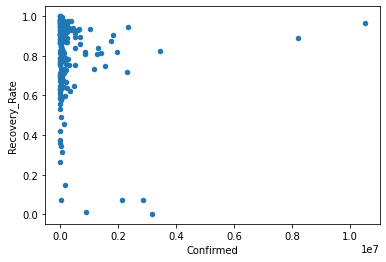

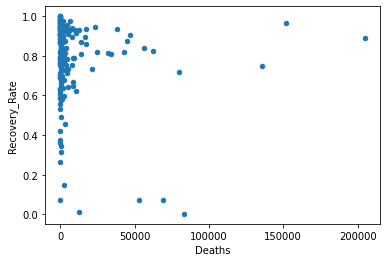

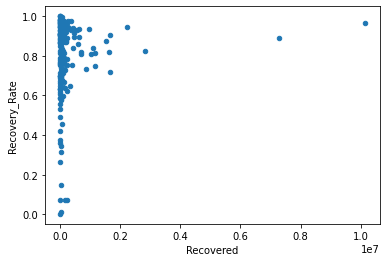

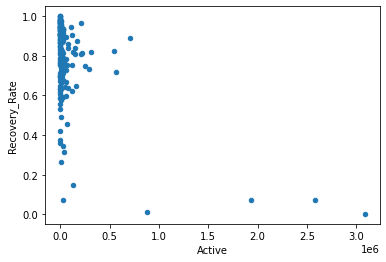

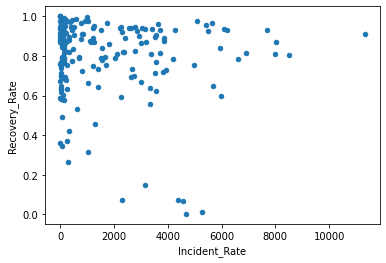

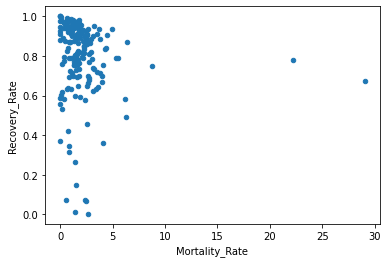

In [95]:
# Scatter Plot between Dependent & Independent columns
cols = data.columns.to_list()
cols.remove('Recovery_Rate')
for i in cols:
  data.plot.scatter(x= i, y='Recovery_Rate')
  print()

In [96]:
#corrleation matrix with carl pearson correlation method
corr_matrix = data.corr(method='pearson')
corr_matrix

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Recovery_Rate
Confirmed,1.000000,0.954453,0.950323,0.864686,0.240720,0.004603,-0.066286
Deaths,0.954453,1.000000,0.822284,0.796272,0.246559,0.068745,-0.104790
Recovered,0.950323,0.822284,1.000000,0.158055,0.108647,0.014231,0.107506
Active,0.864686,0.796272,0.158055,1.000000,0.224467,-0.004576,-0.518815
Incident_Rate,0.240720,0.246559,0.108647,0.224467,1.000000,-0.062467,-0.075819
Mortality_Rate,0.004603,0.068745,0.014231,-0.004576,-0.062467,1.000000,-0.085777
Recovery_Rate,-0.066286,-0.104790,0.107506,-0.518815,-0.075819,-0.085777,1.000000


In [97]:
#corrleation with Recovery_Rate
corr_matrix.Recovery_Rate.sort_values(ascending=False)

Recovery_Rate     1.000000
Recovered         0.107506
Confirmed        -0.066286
Incident_Rate    -0.075819
Mortality_Rate   -0.085777
Deaths           -0.104790
Active           -0.518815
Name: Recovery_Rate, dtype: float64

In [98]:
# Filling missing values with mean strategy

data = data.dropna()

In [99]:
# Rechecking missing values

print(data.isnull().sum())

Confirmed         0
Deaths            0
Recovered         0
Active            0
Incident_Rate     0
Mortality_Rate    0
Recovery_Rate     0
dtype: int64


In [100]:
# Seperate Dependent & Independent Variables
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [101]:
# Splitting Data in training & Testing Data 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
# Testing RMSE for GradientBoostingRegressor, RandomForestRegressor, SVR, Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

rmse_dict = {}

regressors = [
    RandomForestRegressor(n_estimators = 5000, random_state = 0),
    DecisionTreeRegressor(random_state=0),
    SVR(kernel='rbf')
]

for reg in regressors:
    name = reg.__class__.__name__
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    error = mean_squared_error(y_test,y_pred) 
    rmse_dict[name] = error

In [104]:
names=[]
rmse=[]
for key,value in rmse_dict.items():
    names.append(key)
    rmse.append(value)

In [105]:
# RMSE comparision between different Regressors
df_vals = pd.DataFrame(list(zip(names,rmse)),columns=['Regressors','RMSE'])
df_vals

,Regressors,RMSE
0,RandomForestRegressor,0.007210
1,DecisionTreeRegressor,0.010890
2,SVR,0.029247


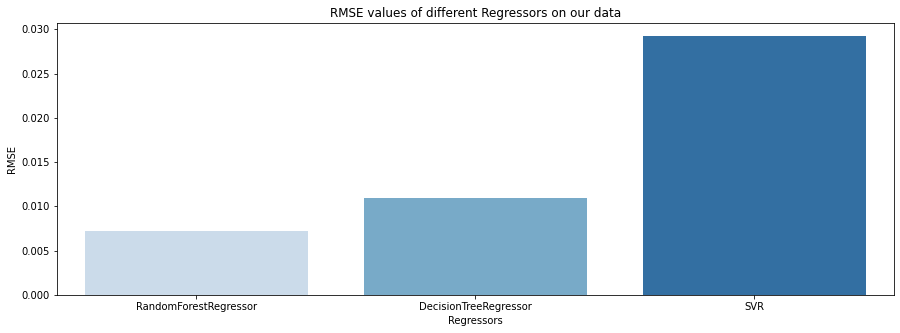

In [109]:
plt.figure(figsize=(15,5))
plt.title('RMSE values of different Regressors on our data')
sns.set_color_codes("muted")
sns.barplot(x='Regressors', y='RMSE', data=df_vals, palette="Blues")

In [ ]:
# Decision Tree Regressor model building
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

from sklearn.metrics import mean_squared_error 
print("MSE_test:")
print(mean_squared_error(y_test, y_pred))

print("R-Squared on test dataset={}".format(dtr.score(x_test,y_test)))

MSE_test:
0.00997581631582906
R-Squared on test dataset=0.8226985039132683


In [110]:
# Model building & fine tuning for lowest RMSE model Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [150,200,250,300,5000], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [111]:
# Get best parameters from grid search
best_parameters

{'max_features': 'auto', 'n_estimators': 250}

In [113]:
# Random Forest Regression model
# Use the best parameters found from above to build the model

regressor = RandomForestRegressor(n_estimators = 250, max_features = 'auto') 
regressor.fit(x_train,y_train)

# Predicting the values 

y_pred = regressor.predict(x_test) 

In [114]:
# Comparing predicted values with true values in testing set

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.05589798171578472

In [115]:
# Using k-fold cross validation to evaluate the performance of the model

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = regressor, X = x_train, y = y_train, cv =10)
accuracy.mean()

0.5552167229801778

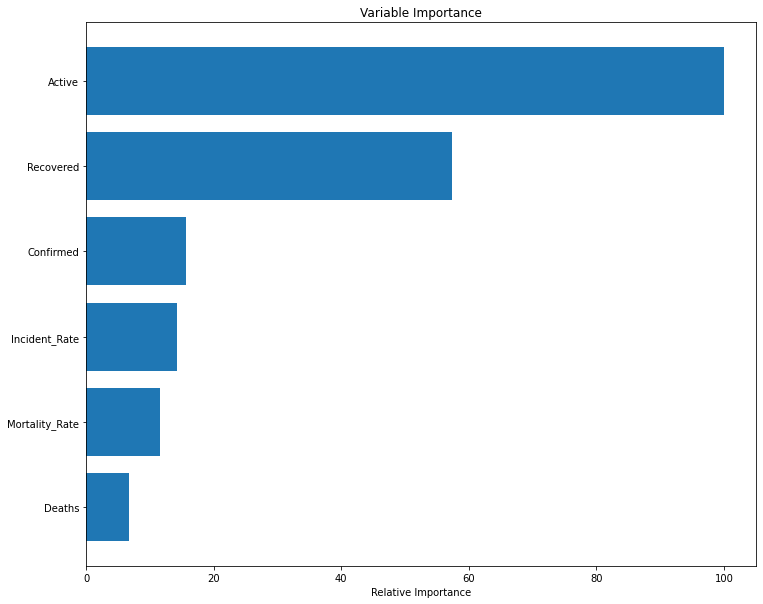

In [116]:
# Relative importance of features for random forest model

feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [117]:
# Train MSE & RMSE
y_train_pred = regressor.predict(x_train)

from sklearn.metrics import mean_squared_error
print("Train_MSE")
print(mean_squared_error(y_train, y_train_pred))
print("Train_RMSE")
print(mean_squared_error(y_train, y_train_pred, squared=False))

Train_MSE
0.0015589206549746857
Train_RMSE
0.03948316926203728


In [118]:
# Test MSE, RMSE & R2-Score
from sklearn.metrics import mean_squared_error
print("Test_MSE")
print(mean_squared_error(y_test, y_pred))
print("Test_RMSE")
print(mean_squared_error(y_test, y_pred, squared=False))

from sklearn.metrics import r2_score
print("R2 Score")
print(r2_score(y_test, y_pred))

Test_MSE
0.008125871126956
Test_RMSE
0.09014361390002067
R2 Score
0.8555778231871403


In [119]:
predictions = regressor.predict(x_test)
predictions

array([0.73053217, 0.79120258, 0.83152806, 0.90071704, 0.96098672,
       0.55831194, 0.87439971, 0.89623345, 0.87251561, 0.66146852,
       0.83105341, 0.85259878, 0.79300446, 0.85170479, 0.83961099,
       0.97374463, 0.90650809, 0.71721674, 0.82802343, 0.66060787,
       0.49391369, 0.90793608, 0.72766566, 0.17969554, 0.80469388,
       0.86548022, 0.84033465, 0.79236536, 0.90356584, 0.69511855,
       0.18715609, 0.82994921, 0.91923865, 0.92462519, 0.85930199,
       0.73490573, 0.8047965 ])

In [120]:
predictions = pd.DataFrame(predictions,y_test)
predictions.to_csv("pred_new.csv")

In [121]:
predictions

,0
Recovery_Rate,
0.755622,0.730532
0.784738,0.791203
0.734147,0.831528
0.928659,0.900717
0.980390,0.960987
0.605042,0.558312
0.895405,0.874400
0.927161,0.896233
0.863636,0.872516


Result : After performing EDA, Preprocessing, comparing multiple regressor models like decision tree, random forest , SVR got R square of around **85%** which is good enough with very low RMSE **0.090**.
The reason I chose emsemble algorithms for modelling was due to limited amount of data. The final predictions on the test set for recovery_rate for covid-19 data from this model is very accurate.